In [ ]:
%pip install pandas matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('training.csv')

df["Name Length"] = df["Name"].apply(len)

df.to_csv('training.csv', index=False)

In [4]:
print(df["Name Length"].describe())

count    891.000000
mean      26.965208
std        9.281607
min       12.000000
25%       20.000000
50%       25.000000
75%       30.000000
max       82.000000
Name: Name Length, dtype: float64


C:\Users\arpit\AppData\Local\Temp\ipykernel_10020\3504419672.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_Rate = df.groupby("Name Length Bins")["Survived"].mean()


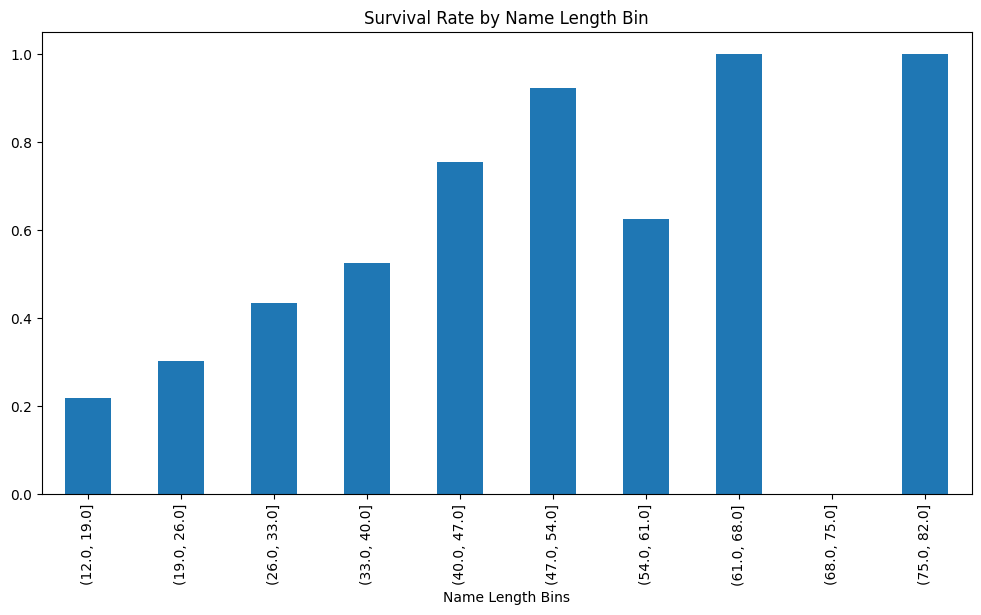

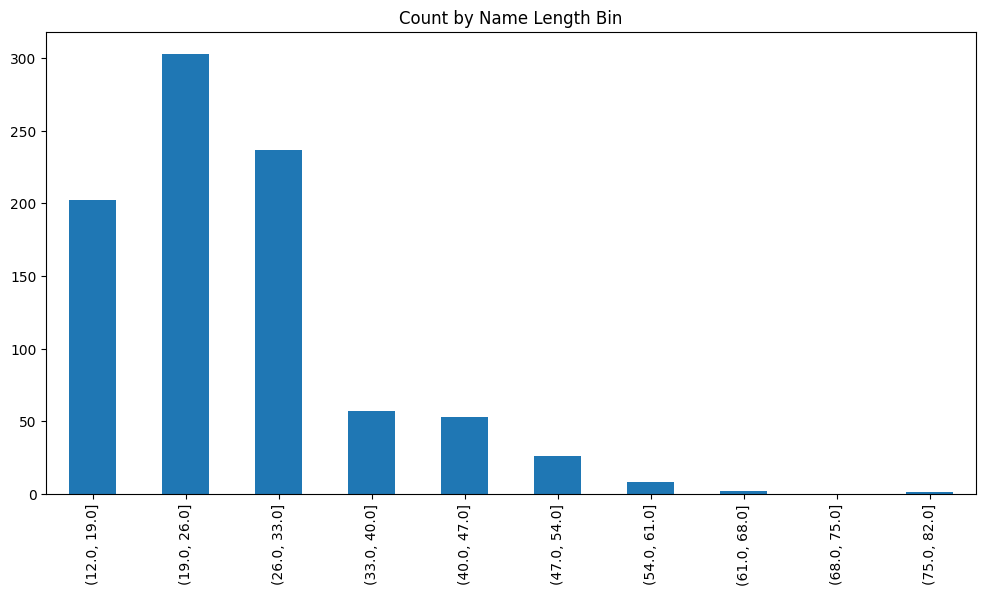

In [5]:
import numpy as np

bins = np.linspace(df["Name Length"].min(), df["Name Length"].max(), num=11)
df["Name Length Bins"] = pd.cut(df["Name Length"], bins)

survival_Rate = df.groupby("Name Length Bins")["Survived"].mean()
survival_Rate.plot(kind="bar", figsize=(12, 6))
plt.title("Survival Rate by Name Length Bin")
plt.show()

df["Name Length Bins"].value_counts().reindex(df["Name Length Bins"].cat.categories, fill_value=0).plot(kind="bar", figsize=(12, 6))
plt.title("Count by Name Length Bin")
plt.show()

In [6]:
df.drop("Name Length Bins", axis=1, inplace=True)

In [7]:
df["Pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [8]:
survival_rate_pclass = df.groupby("Pclass")["Survived"].mean()
print(survival_rate_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [9]:
df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [10]:
df["Age"].describe()

count    891.000000
mean      29.837901
std       13.289578
min        0.420000
25%       21.800000
50%       30.000000
75%       35.600000
max       80.000000
Name: Age, dtype: float64

In [11]:
df["AgeEstimated"] = df["Age"].apply(lambda x: 1 if pd.isna(x) or (isinstance(x, float) and x % 1 == 0.5) else 0)
df.to_csv('training.csv', index=False)

In [12]:
print("Miss.:", df[df["Name"].str.contains("Miss.")]["Age"].mean())
print("Mr.:", df[df["Name"].str.contains("Mr.")]["Age"].mean())
print("Mrs.:", df[df["Name"].str.contains("Mrs.")]["Age"].mean())
print("Master.:", df[df["Name"].str.contains("Master.")]["Age"].mean())

Miss.: 21.77912087912088
Mr.: 33.180216383307574
Mrs.: 35.63720930232558
Master.: 4.57675


In [13]:
age_map = {
    "Miss.": 21.8,
    "Mr.": 33.1,
    "Mrs.": 35.6,
    "Master.": 4.6
}

def fill_age(row):
    if pd.isna(row["Age"]):
        for title, avg_age in age_map.items():
            if title in row["Name"]:
                return avg_age
        return row["Age"] 
    return row["Age"]

df["Age"] = df.apply(fill_age, axis=1)

In [14]:
df["Age"].describe()

count    891.000000
mean      29.837901
std       13.289578
min        0.420000
25%       21.800000
50%       30.000000
75%       35.600000
max       80.000000
Name: Age, dtype: float64

In [15]:
missing_age_passenger_ids = df[df["Age"].isna()]["PassengerId"].tolist()
print(missing_age_passenger_ids)

#case handled manually

[]


In [16]:
df.to_csv("training.csv", index=False)

In [17]:
df = pd.read_csv("training.csv")
df["Age"].describe()

count    891.000000
mean      29.837901
std       13.289578
min        0.420000
25%       21.800000
50%       30.000000
75%       35.600000
max       80.000000
Name: Age, dtype: float64

In [18]:
df["SibSp"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [19]:
df["Parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [20]:
print(df[df["SibSp"] == 0].shape[0], df[df["SibSp"] == 1].shape[0])
print(df[df["Parch"] == 0].shape[0], df[df["Parch"] == 1].shape[0])

608 209
678 118


C:\Users\arpit\AppData\Local\Temp\ipykernel_10020\1294797248.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_sibsp = df.groupby("SibSp_bucket")["Survived"].mean()


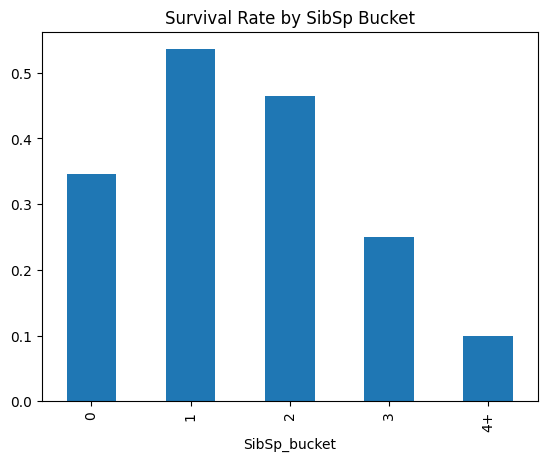

C:\Users\arpit\AppData\Local\Temp\ipykernel_10020\1294797248.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_parch = df.groupby("Parch_bucket")["Survived"].mean()


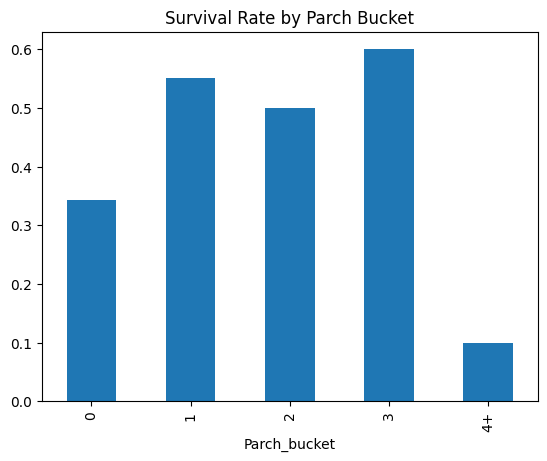

In [21]:
df["SibSp_bucket"] = pd.cut(df["SibSp"], bins=[-1,0,1,2,3,8], labels=["0","1","2","3","4+"])
survival_sibsp = df.groupby("SibSp_bucket")["Survived"].mean()
survival_sibsp.plot(kind="bar", title="Survival Rate by SibSp Bucket")
plt.show()

df["Parch_bucket"] = pd.cut(df["Parch"], bins=[-1,0,1,2,3,6], labels=["0","1","2","3","4+"])
survival_parch = df.groupby("Parch_bucket")["Survived"].mean()
survival_parch.plot(kind="bar", title="Survival Rate by Parch Bucket")
plt.show()

537 29


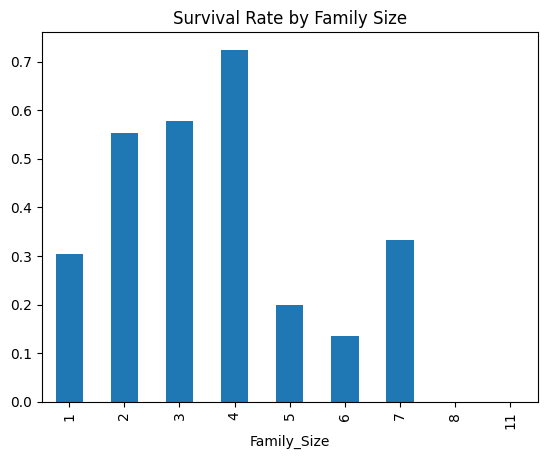

In [22]:
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1

print(df[df["Family_Size"] == 1].shape[0], df[df["Family_Size"] == 4].shape[0])

survival_family_size = df.groupby("Family_Size")["Survived"].mean()
survival_family_size.plot(kind="bar", title="Survival Rate by Family Size")
plt.show()

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'isAlone', 'Ticket_Prefix', 'CabinInfo', 'SibSp_bucket',
       'Parch_bucket', 'Family_Size'],
      dtype='object')

In [24]:
df.drop(["SibSp_bucket", "Parch_bucket"], axis=1, inplace=True)


In [25]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'isAlone', 'Ticket_Prefix', 'CabinInfo', 'Family_Size'],
      dtype='object')

In [26]:
df["isAlone"] = (df["Family_Size"] == 1).astype(int)

In [27]:
df.drop("Family_Size", axis=1, inplace=True)

In [28]:
survival_isalone = df.groupby("isAlone")["Survived"].mean()
print(survival_isalone)

isAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


In [29]:
df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [30]:
ticket_first_chars = df["Ticket"].astype(str).str[0]
counts = ticket_first_chars.value_counts()
survival_rates = df.groupby(ticket_first_chars)["Survived"].mean()

print("Number of unique first characters:", counts.shape[0])
for char in counts.index:
    print(f"{char}: {counts[char]}, Survival Rate: {survival_rates[char]:.2f}")

Number of unique first characters: 16
3: 301, Survival Rate: 0.24
2: 183, Survival Rate: 0.46
1: 146, Survival Rate: 0.63
P: 65, Survival Rate: 0.65
S: 65, Survival Rate: 0.32
C: 47, Survival Rate: 0.34
A: 29, Survival Rate: 0.07
W: 13, Survival Rate: 0.15
4: 10, Survival Rate: 0.20
7: 9, Survival Rate: 0.11
F: 7, Survival Rate: 0.57
6: 6, Survival Rate: 0.17
L: 4, Survival Rate: 0.25
5: 3, Survival Rate: 0.00
8: 2, Survival Rate: 0.00
9: 1, Survival Rate: 1.00


In [31]:
df["Ticket_Prefix"] = df["Ticket"].astype(str).str[0]

In [32]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\arpit\AppData\Local\Temp\ipykernel_10020\78576743.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_fare = df.groupby("Fare_Bucket")["Survived"].mean()


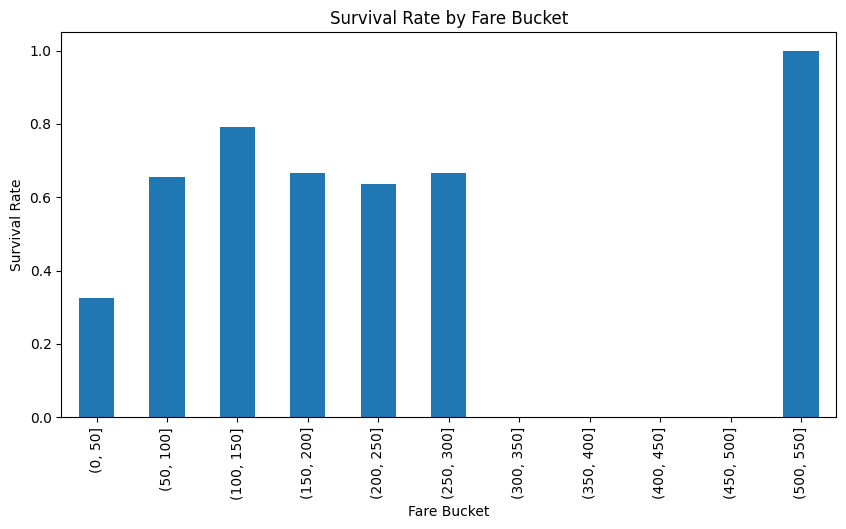

In [33]:
fare_bins = range(0, int(df["Fare"].max()) + 51, 50)
df["Fare_Bucket"] = pd.cut(df["Fare"], bins=fare_bins)
survival_fare = df.groupby("Fare_Bucket")["Survived"].mean()
survival_fare.plot(kind="bar", title="Survival Rate by Fare Bucket", figsize=(10,5))
plt.xlabel("Fare Bucket")
plt.ylabel("Survival Rate")
plt.show()

In [34]:
df.drop("Fare_Bucket", axis=1, inplace=True)

In [35]:
df["Cabin"].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [36]:
empty_cabin_survival = df[df["Cabin"].isna()]["Survived"].mean()
nonempty_cabin_survival = df[df["Cabin"].notna()]["Survived"].mean()

print(f"Survival rate if Cabin is empty: {empty_cabin_survival:.2f}")
print(f"Survival rate if Cabin is non-empty: {nonempty_cabin_survival:.2f}")

Survival rate if Cabin is empty: 0.30
Survival rate if Cabin is non-empty: 0.67


In [37]:
df_nonempty_cabin = df[df["Cabin"].notna()]

df_nonempty_cabin["Cabin_First"] = df_nonempty_cabin["Cabin"].astype(str).str[0]

cabin_counts = df_nonempty_cabin["Cabin_First"].value_counts()
cabin_survival = df_nonempty_cabin.groupby("Cabin_First")["Survived"].mean()

print("Cabin first letter group counts and survival rates:")
for letter in cabin_counts.index:
    print(f"{letter}: Count = {cabin_counts[letter]}, Survival Rate = {cabin_survival[letter]:.2f}")

Cabin first letter group counts and survival rates:
C: Count = 59, Survival Rate = 0.59
B: Count = 47, Survival Rate = 0.74
D: Count = 33, Survival Rate = 0.76
E: Count = 32, Survival Rate = 0.75
A: Count = 15, Survival Rate = 0.47
F: Count = 13, Survival Rate = 0.62
G: Count = 4, Survival Rate = 0.50
T: Count = 1, Survival Rate = 0.00


C:\Users\arpit\AppData\Local\Temp\ipykernel_10020\4245712816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonempty_cabin["Cabin_First"] = df_nonempty_cabin["Cabin"].astype(str).str[0]


In [38]:
cabin_survival_map = {
    "A": 0.47,
    "B": 0.74,
    "C": 0.59,
    "D": 0.76,
    "E": 0.75,
    "F": 0.62,
    "G": 0.50,
    "T": 0.00
}

def cabin_info(row):
    if pd.isna(row["Cabin"]):
        return 0.30
    first_letter = str(row["Cabin"])[0]
    return cabin_survival_map.get(first_letter, 0.30)

df["CabinInfo"] = df.apply(cabin_info, axis=1)

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'isAlone', 'Ticket_Prefix', 'CabinInfo'],
      dtype='object')

In [40]:
df["Embarked"].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [41]:
df["Embarked"].fillna("S", inplace=True)

C:\Users\arpit\AppData\Local\Temp\ipykernel_10020\2591539637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S", inplace=True)


In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'isAlone', 'Ticket_Prefix', 'CabinInfo'],
      dtype='object')

In [43]:
df.to_csv("training.csv", index=False)

In [44]:
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [45]:
df.drop("PassengerId", axis=1, inplace=True)


In [46]:
df.to_csv("final_training.csv", index=False)

In [47]:
print(df.isna().sum())

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Name Length      0
AgeEstimated     0
isAlone          0
Ticket_Prefix    0
CabinInfo        0
dtype: int64
